<a href="https://colab.research.google.com/github/Segtanof/pyfin/blob/main/06_Data_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Retrieval

Generally, it is best practice to collect all of your imports at the top of your notebook.

Our imports:

In [ ]:
!pip install great_tables

In [ ]:
import pandas as pd
import numpy as np # We need this for the NaN value
import great_tables as gt

# This allows us to access Google Drive, where we upload our files to
from google.colab import drive

In [ ]:
# Mount the drive to the path /content/drive
# Requires authentication!
drive.mount('/content/drive')

## WRDS data download

Now, let's download some data from WRDS. A very common database is CRSP. It holds stock price and other market data for many stocks.

We can find the dataset [here](https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/stock-security-files/daily-stock-file/).
See the selections in the screenshot.
Additionally, select gzip for compression to save space.

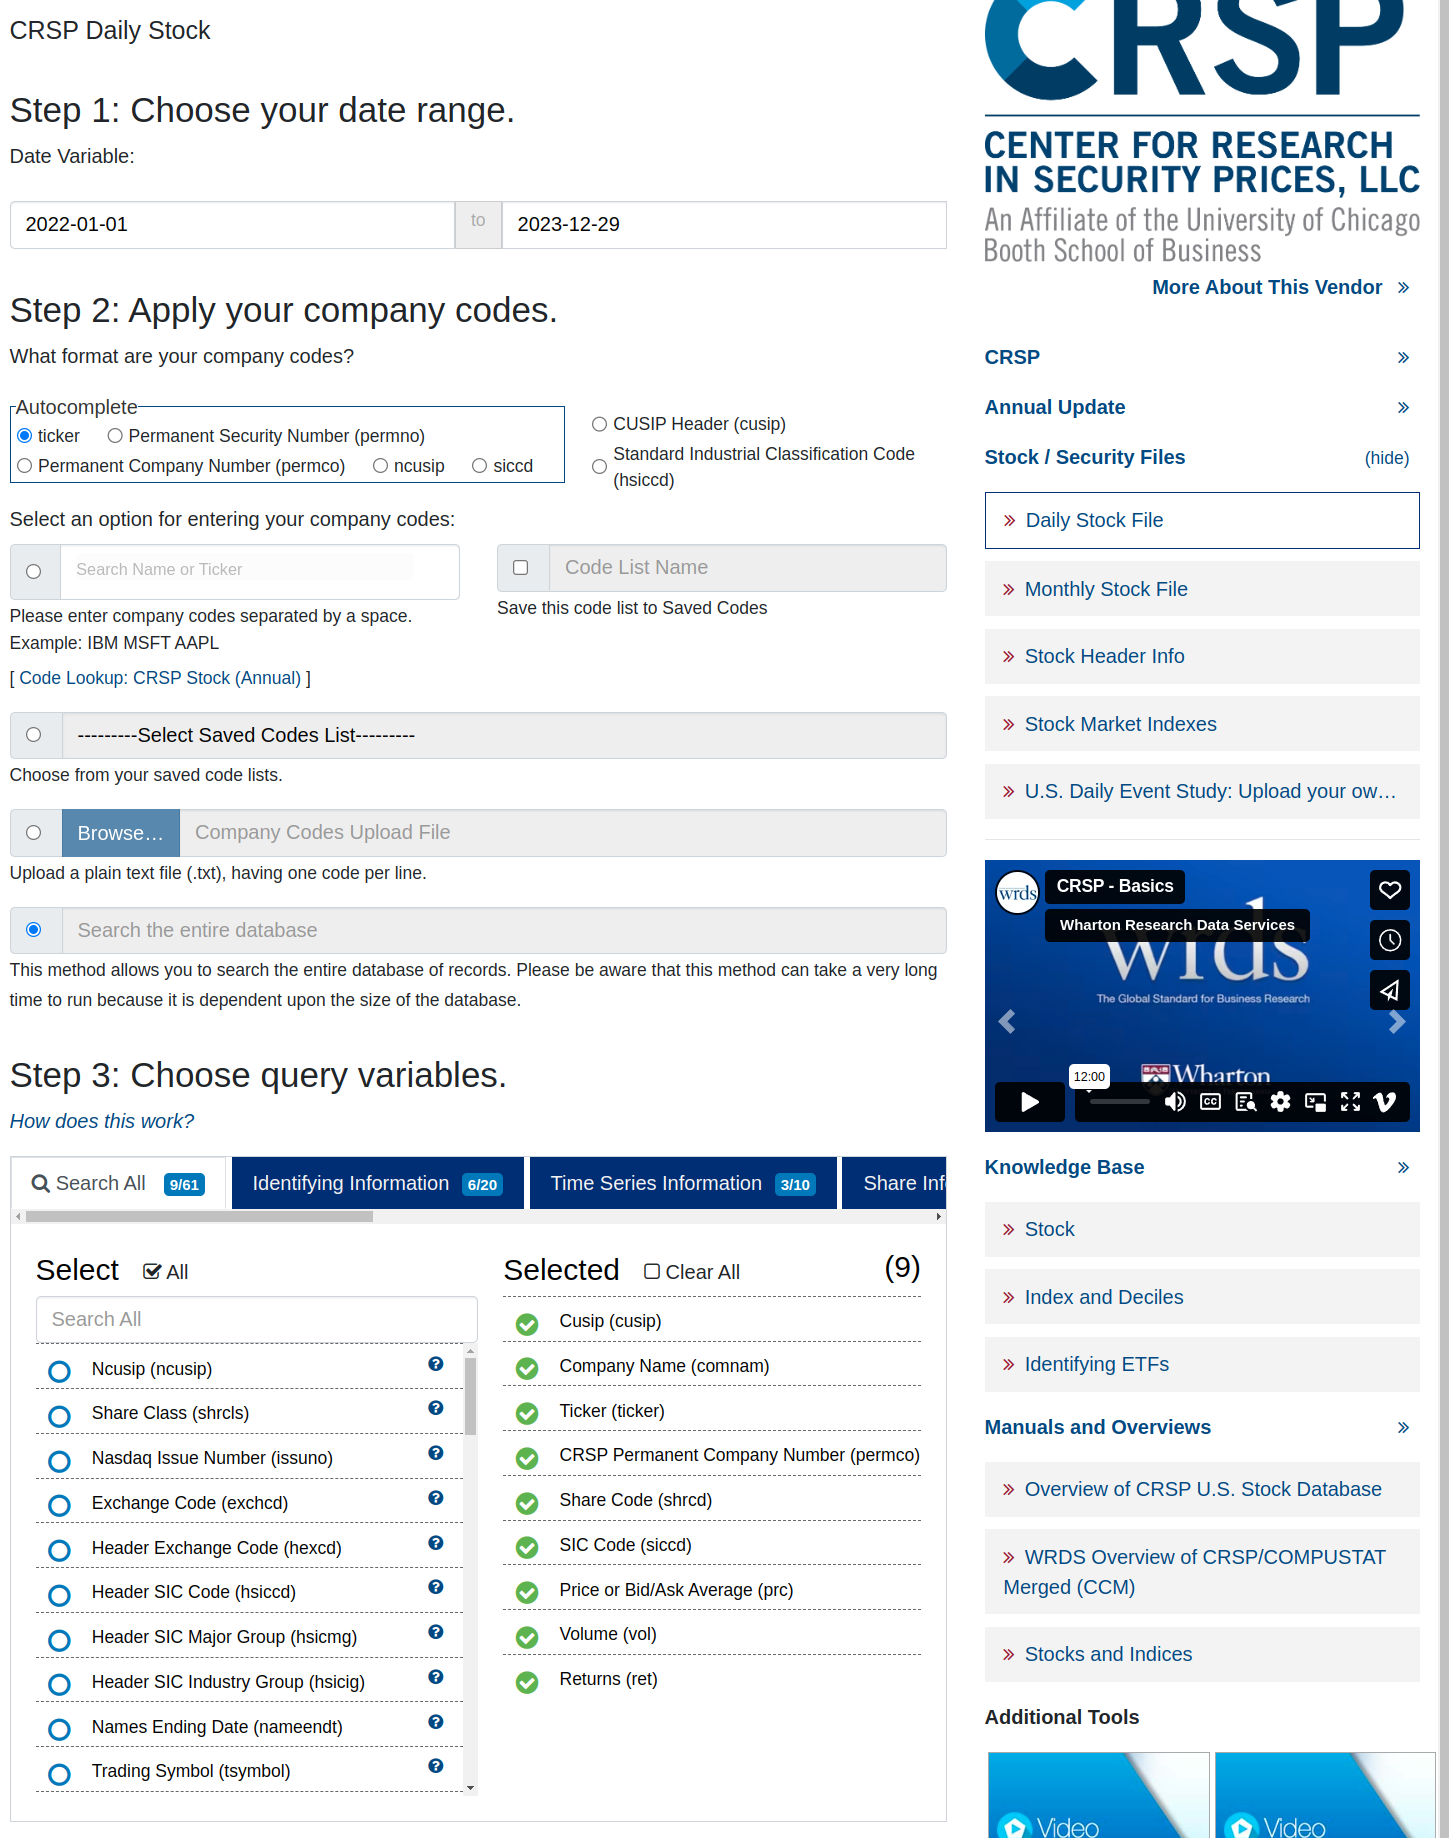

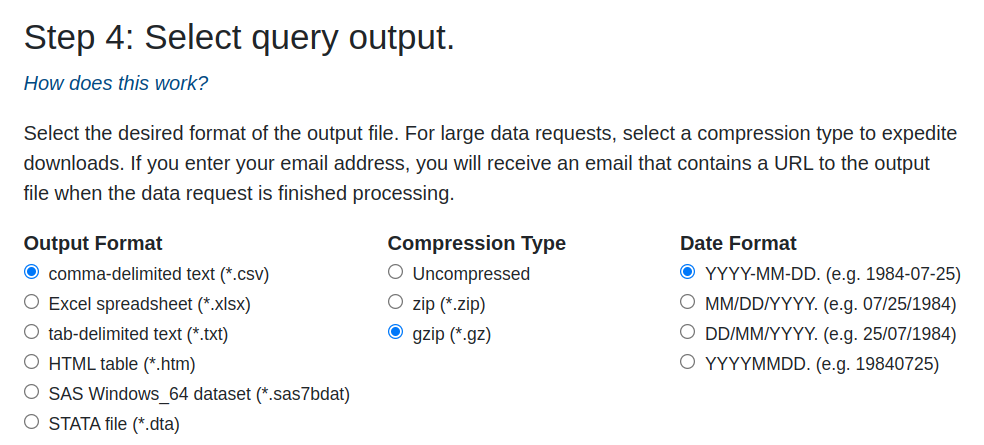

Then, the data will be prepared and we can see a query number:

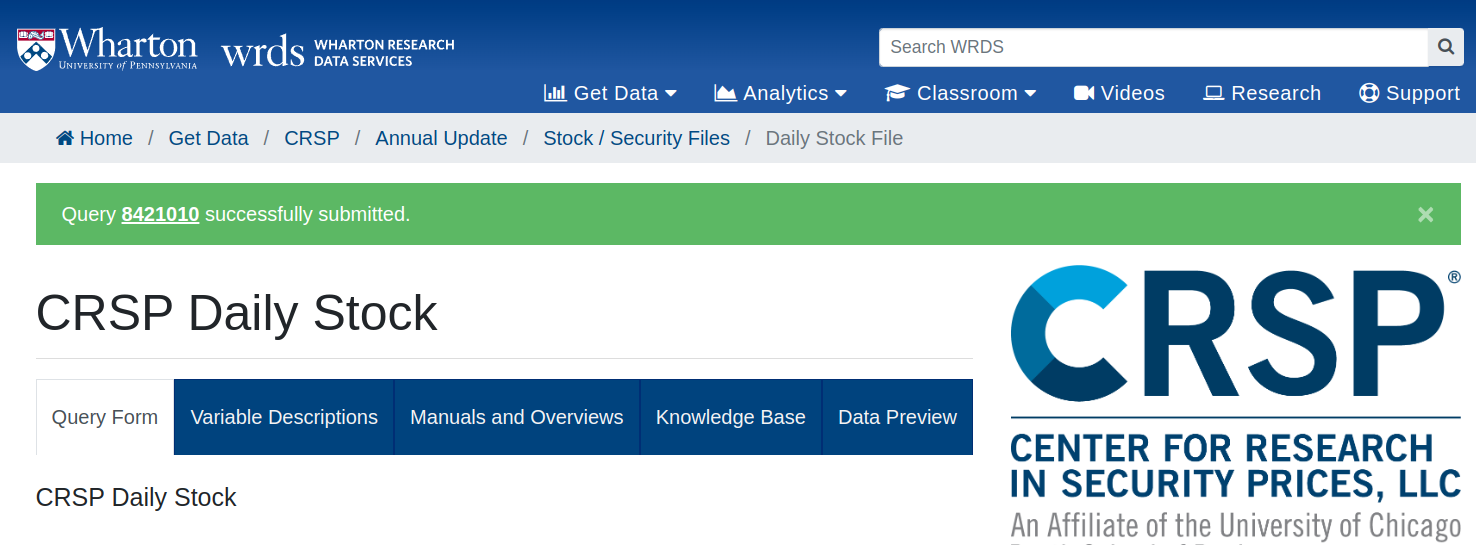

You can click on the query number to open the progress page. After a few minutes, you should see "Success" and a link to download the output file.

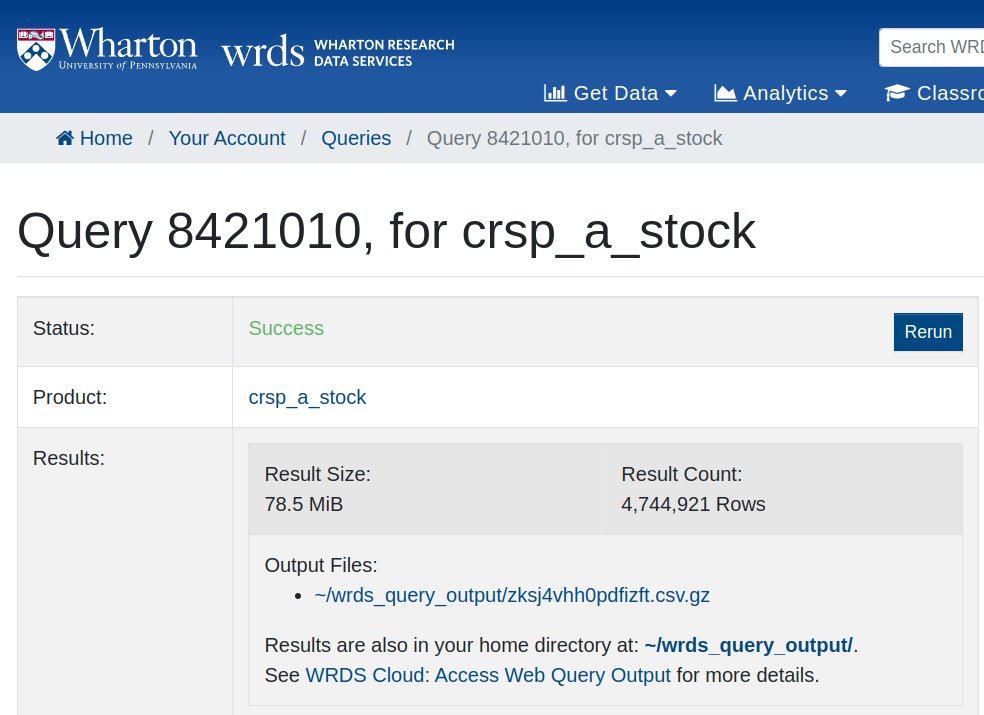

Then, upload the file to your Google Drive through the web interface or another way.

**There is no need to unzip the file!**

## Loading the data

We can get the file path by opening the file menu on the left hand side, navigating to the file and then selecting "Copy Path" on the 3-dot menu.

In [ ]:
crsp_file = "/content/drive/MyDrive/Colab Notebooks/Python course 2024-11/Data/crsp.csv.gz" # You need to adjust the path to where you uploaded it to

In [ ]:
# If you were unable to download the file, uncomment the following lines
# !gdown 1rS5QeNd0mApFsBuiY-KfUhugpjeKo0Ey
# crsp_file = "/content/crsp.csv.gz"

In [ ]:
crsp_unclean = pd.read_csv(crsp_file, low_memory=False, parse_dates=['date'])
crsp_raw = crsp_unclean.copy() # Don't worry about this for now!

In [ ]:
crsp_unclean.head(2)

In [ ]:
# Let's rename the columns to lowercase to save us the shift key
crsp_unclean.columns

In [ ]:
crsp_unclean.columns.str.lower()

Now what did that do? `crsp_unclean.columns` accesses the column names.
`.str` is the [string accessor](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html) of the columns. It allows us to perform methods, which we would normally perform on a string, to all column names in one go.

In [ ]:
print("aBcDeF".lower())
print("Hello World!".replace(" ", "_"))
print("Hello World!".replace(" ", "_").lower()) # We can keep chaining them, because we are returning a string each time!

In [ ]:
crsp_unclean.columns = crsp_unclean.columns.str.lower()

Check the first few rows:

In [ ]:
crsp_unclean.head()

**Quick exercise**

- Check the shape and the info of the data.
- Write a function `clean_colnames` that takes a DataFrame and lowercases and replaces spaces with underscores for the columns. Test your function on `crsp_raw`.

Check the data types via info. What do we notice? The return (`ret`) should be a `float`, but it is an `object`. When checking dtypes, `object` can hold any other data type, e.g. lists, dictionaries, etc. but also strings! You will never see `string` in this list!

In [ ]:
crsp_unclean.info()

In [ ]:
type(crsp_unclean.loc[0,"ret"])

Because we cannot calculate with strings, we want to convert it to a `float`. Let's write our own function for that.

In [ ]:
def str_to_float(value):
  try:
    return float(value)
  except ValueError:
    return np.nan # Return a NaN (not a number) to indicate a missing value

In [ ]:
crsp = crsp_unclean.assign(ret = lambda x: x['ret'].apply(str_to_float))
# We can use the assign method to create a new column or overwrite an existing one

Verify that it is indeed fixed:

In [ ]:
crsp.dtypes

**Quick exercise**

Use your function from above `clean_colnames`, apply it to `crsp_raw` and then clean up the returns in a single line.

## Overview over the data

How many unique firms do we have in the data? In CRSP, firms are uniquely identified by their `permco`.

In [ ]:
n_unique_firms = crsp['permco'].nunique()

In [ ]:
print(f"We have {n_unique_firms:,} unique firms in the data.")

How many values are missing in each column? If a numeric value is missing it is `na` or `nan`.

In [ ]:
crsp.isna().head(2)

In [ ]:
crsp.isna().sum()

In [ ]:
crsp.isna().sum().plot.bar(title="Missing values by column")

**Quick exercise**

- How many unique share codes do we have?
- Which ones?
- `DataFrame`s have the method `drop_duplicates()`. Look at the mouse-hover documentation and then drop all duplicates based on the share code column. Which rows are kept?

## Descriptive statistics

Let's use the `describe` method to quickly get some descriptive statistics. Then let's make a beautiful table out of that.

In [ ]:
# Call the describe function => transpose => round to two decimal places and show
desc_stats = crsp.describe()#.drop(columns=['permco','permno','shrcd']).iloc[1:].reset_index()

In [ ]:
desc_stats

In [ ]:
gt_table = (
    gt.GT(desc_stats)
    .tab_stub(rowname_col="index")
    .fmt_percent(
        columns=['ret'],
        decimals=2  # Number of decimal places
    )
    .fmt_number(
        # Format numeric columns
        columns=['vol'],
        compact=True  # Number of decimal places
    )
    .fmt_currency(
        columns=['prc'],
        decimals=2  # Number of decimal places
    )
    .fmt_date(
        columns=['date'],
    )
    .tab_header(
        title="Descriptive Statistics",
        subtitle="Summary of CRSP data"
    )
)
gt_table

## Exercises

### Exercise 1

a)
- Narrow down the data to the following companies:
`tech_companies = ["AAPL", "TSLA", "AMZN", "GOOG"]`
- Pivot the data so that we have prices as values
- Plot the price development over time


b)
- Pivot the data so that we have the returns as values
- Write a function that takes a column of returns and calculates the prices. *Hint: Look at the `cumprod` method.*
- Plot the new price developments.

c)

- Show the descriptive statistics of the prices from returns in a beautiful table. Show the 1%, Median, and 99% only.

### Exercise 2

Go back to WRDS and download the same data, but pre-filtered to the 4 tech companies.